In [12]:
import pandas as pd

## Load Dataset

In [5]:
train = pd.read_csv("train.csv")

print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


## Explore

In [6]:
## 시각화 출력 시 사용하는 옵션 1) file로 저장하기 2) jupyter notebook에 바로 출력 --> %옵션은 바로 출력
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Dates

In [24]:
train["Dates"] = pd.to_datetime(train["Dates"])
train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second

print(train.shape)
train.head()

(878049, 15)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,0


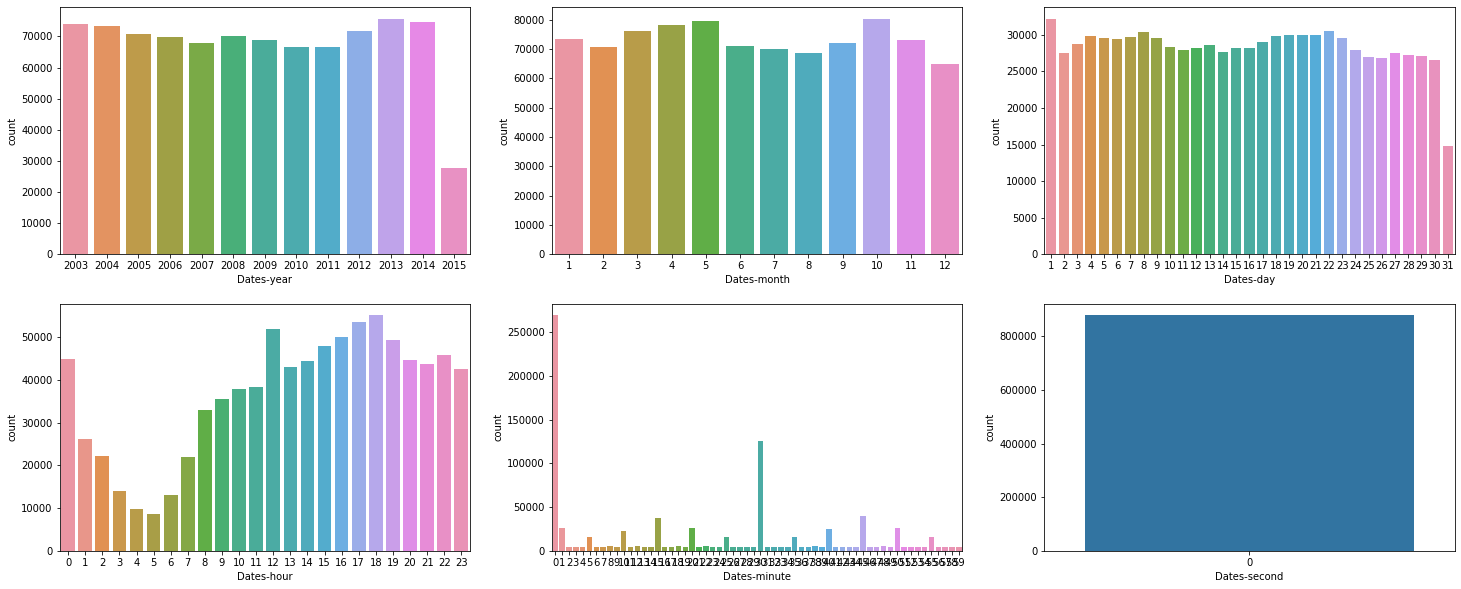

In [34]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(25,10)
sns.countplot(data=train, x="Dates-year",ax=ax1)
sns.countplot(data=train, x="Dates-month",ax=ax2)
sns.countplot(data=train, x="Dates-day",ax=ax3)
sns.countplot(data=train, x="Dates-hour",ax=ax4)
sns.countplot(data=train, x="Dates-minute",ax=ax5)
sns.countplot(data=train, x="Dates-second",ax=ax6)

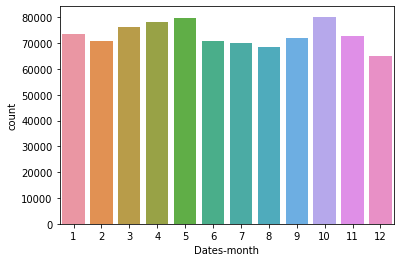

## X,Y

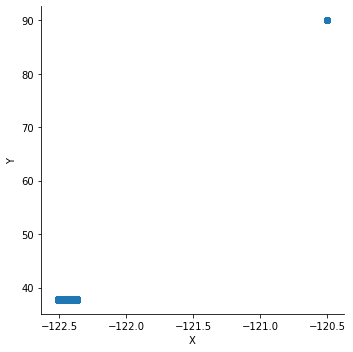

In [39]:
#train[["X","Y"]]

sns.lmplot(data=train, x="X", y="Y", fit_reg=False) 

In [42]:
train["X"].max(), train["Y"].max()

(-120.5, 90.0)

In [45]:
# 우상단에 있는 데이터 예와 값이 outlier라는 가정을 했을 때
# outlier의 데이터 수 파악하여 머신러닝 알고리즘 개선에 적용해보기 위해서.

X_outliers =(train["X"] == train["X"].max())
Y_outliers = (train["Y"] == train["Y"].max())

outlier = train[X_outliers & Y_outliers]

print(outlier.shape)
outlier

# 87만개 데이터 중에서 outlier가 67개이기 떄문에 이 부분을 개선하여도 성능에 큰 영향이 없음
# 따라서 이 데이터가 outlier가 맞는지만 판단.
# 위도와 경도 데이터가 소수점 세쨰자리까지 존재해야하는데 데이터 손힐
# 만약 동일 경,위도라면 주소가 같아야 하는데 주소는 또 다름.
# Addres 인덱스랑 비교해서 데이터 정확도 및 outlier여부 판단


(67, 15)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0,2005,12,30,17,0,0
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0,2005,12,29,0,7,0
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0,2005,11,30,11,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844995,2003-06-11 08:49:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,INGLESIDE,"ARREST, CITED",JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0,2003,6,11,8,49,0
845842,2003-06-09 09:25:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,INGLESIDE,"ARREST, CITED",JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0,2003,6,9,9,25,0
852880,2003-05-02 01:00:00,SEX OFFENSES FORCIBLE,"FORCIBLE RAPE, BODILY FORCE",Friday,SOUTHERN,COMPLAINANT REFUSES TO PROSECUTE,3RD ST / JAMES LICK FREEWAY HY,-120.5,90.0,2003,5,2,1,0,0
857248,2003-04-14 16:30:00,ROBBERY,"ROBBERY ON THE STREET, STRONGARM",Monday,BAYVIEW,COMPLAINANT REFUSES TO PROSECUTE,GILMAN AV / FITCH ST,-120.5,90.0,2003,4,14,16,30,0


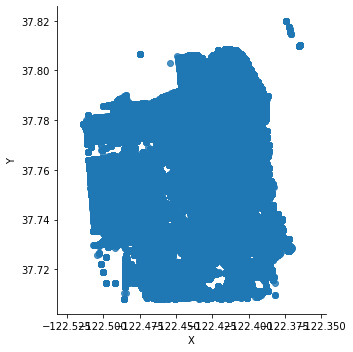

In [48]:
non_outliers = train[~(X_outliers & Y_outliers)]

sns.lmplot(data=non_outliers, x="X", y="Y", fit_reg=False)

## Reload Dataset

In [13]:
train = pd.read_csv("train.csv")

print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [14]:
test = pd.read_csv("test.csv",index_col= "Id")
print(test.shape)
test.head()

(884262, 6)


,Dates,DayOfWeek,PdDistrict,Address,X,Y
Id,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


## Train

In [15]:
feature_names = ["X","Y"]
feature_names

['X', 'Y']

In [16]:
X_train=train[feature_names]
print(X_train.shape)
X_train.head()

(878049, 2)


,X,Y
0,-122.425892,37.774599
1,-122.425892,37.774599
2,-122.424363,37.800414
3,-122.426995,37.800873
4,-122.438738,37.771541


In [17]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(884262, 2)


,X,Y
Id,,
0,-122.399588,37.735051
1,-122.391523,37.732432
2,-122.426002,37.792212
3,-122.437394,37.721412
4,-122.437394,37.721412


In [18]:
label_name = "Category"
Y_train = train[label_name]
print(Y_train.shape)
Y_train.head()

(878049,)


0          WARRANTS
1    OTHER OFFENSES
2    OTHER OFFENSES
3     LARCENY/THEFT
4     LARCENY/THEFT
Name: Category, dtype: object

## Use Random Forest

In [ ]:
# descion tree의 응용버전 --MAIN

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 10,
                               n_jobs = -1, #병렬처리 (-1의 경우에는 모든 코어 전부 사용)
                               random_state = 37) #결과가 바뀌지 않게 하기위해서 값을 보정하는 것
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=37, verbose=0,
                       warm_start=False)

### 모델 검증과 측정 공식

### Evaluate

In [24]:
from sklearn.model_selection import train_test_split

# hold-out validation 하는 것처럼 8:2로 쪼개줌
X_train_kf, X_test_kf, Y_train_kf, Y_test_kf = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 37)

print(X_train_kf.shape, Y_train_kf.shape)
print(X_test_kf.shape, Y_train_kf.shape)

(702439, 2) (702439,)
(175610, 2) (702439,)


In [28]:
%time model.fit(X_train_kf, Y_train_kf)

Wall time: 5.64 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=37, verbose=0,
                       warm_start=False)

In [30]:
model.predict(X_test_kf)

array(['LARCENY/THEFT', 'VANDALISM', 'LARCENY/THEFT', ...,
       'LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL'], dtype=object)

In [14]:
%time model.fit(X_train,Y_train)

Wall time: 11.5 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=37, verbose=0,
                       warm_start=False)

In [23]:
prediction_list = model.predict_proba(X_test)

print(prediction_list.shape)
prediction_list

(884262, 39)


array([[0.        , 0.08809825, 0.        , ..., 0.22377007, 0.14240867,
        0.        ],
       [0.        , 0.10375124, 0.        , ..., 0.06407299, 0.09414945,
        0.01365225],
       [0.        , 0.0827316 , 0.        , ..., 0.19073219, 0.        ,
        0.        ],
       ...,
       [0.        , 0.14340178, 0.        , ..., 0.15787203, 0.032328  ,
        0.        ],
       [0.        , 0.0991478 , 0.        , ..., 0.05361619, 0.        ,
        0.05875233],
       [0.00307341, 0.05088835, 0.00060181, ..., 0.01757337, 0.05365104,
        0.00401779]])

## Submit

In [26]:
sample_submission = pd.read_csv("sampleSubmission.csv", index_col="Id")

submission = pd.DataFrame(prediction_list,
                          index = sample_submission.index,
                          columns = model.classes_ )
print(submission.shape)
submission.head()

(884262, 39)


,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.088098,0.0,0.0,0.000000,0.000000,0.000000,0.032852,0.00000,0.029211,...,0.0,0.00000,0.0,0.095305,0.0,0.000000,0.152210,0.223770,0.142409,0.000000
1,0.0,0.103751,0.0,0.0,0.000000,0.000000,0.004104,0.052227,0.00000,0.000000,...,0.0,0.00000,0.0,0.025692,0.0,0.002606,0.007048,0.064073,0.094149,0.013652
2,0.0,0.082732,0.0,0.0,0.224696,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.00000,0.0,0.062187,0.0,0.000000,0.138730,0.190732,0.000000,0.000000
3,0.0,0.208781,0.0,0.0,0.036316,0.022939,0.012555,0.048533,0.00906,0.000000,...,0.0,0.00836,0.0,0.051164,0.0,0.000000,0.086190,0.000000,0.070167,0.052349
4,0.0,0.208781,0.0,0.0,0.036316,0.022939,0.012555,0.048533,0.00906,0.000000,...,0.0,0.00836,0.0,0.051164,0.0,0.000000,0.086190,0.000000,0.070167,0.052349


In [27]:
submission.to_csv("baseline-script.csv")